<a href="https://colab.research.google.com/github/oallanfarias/pandas/blob/main/praticarEXERCICIO_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import pandera as pa 

In [ ]:
pd.set_option('display.max_columns',100)

####DATAFRAME

In [ ]:
df = pd.read_csv('/content/sample_data/DADOS_ABERTOS_MEDICAMENTOS.csv', encoding = 'latin-1', sep=';')

In [ ]:
df.head(3)

,TIPO_PRODUTO,NOME_PRODUTO,DATA_FINALIZACAO_PROCESSO,CATEGORIA_REGULATORIA,NUMERO_REGISTRO_PRODUTO,DATA_VENCIMENTO_REGISTRO,NUMERO_PROCESSO,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,MEDICAMENTO,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,MEDICAMENTO,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,MEDICAMENTO,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN


####TRATAMENTO DOS DADOS

In [ ]:
#VERIFICANDO DADOS
df.CATEGORIA_REGULATORIA.is_unique

False

In [ ]:
df.dtypes

TIPO_PRODUTO                  object
NOME_PRODUTO                  object
DATA_FINALIZACAO_PROCESSO     object
CATEGORIA_REGULATORIA         object
NUMERO_REGISTRO_PRODUTO        int64
DATA_VENCIMENTO_REGISTRO      object
NUMERO_PROCESSO                int64
CLASSE_TERAPEUTICA            object
EMPRESA_DETENTORA_REGISTRO    object
SITUACAO_REGISTRO             object
PRINCIPIO_ATIVO               object
dtype: object

In [ ]:
#VERIFICANDO DADOS
#sorted(pd.unique(df['NUMERO_PROCESSO']))
sorted(df.NUMERO_PROCESSO.unique())

[25000000016,
 25000000017,
 25000000019,
 25000000020,
 25000000023,
 25000000039,
 25000000095,
 25000000111,
 25000000113,
 25000000119,
 25000000120,
 25000000121,
 25000000122,
 25000000123,
 25000000124,
 25000000125,
 25000000126,
 25000000127,
 25000000128,
 25000000130,
 25000000131,
 25000000138,
 25000000139,
 25000000140,
 25000000142,
 25000000147,
 25000000148,
 25000000150,
 25000000174,
 25000000189,
 25000000190,
 25000000192,
 25000000195,
 25000000203,
 25000000204,
 25000000206,
 25000000208,
 25000000227,
 25000000273,
 25000000274,
 25000000275,
 25000000276,
 25000000277,
 25000000313,
 25000000315,
 25000000316,
 25000000320,
 25000000321,
 25000000322,
 25000000323,
 25000000324,
 25000000327,
 25000000329,
 25000000331,
 25000000334,
 25000000346,
 25000000349,
 25000000350,
 25000000351,
 25000000352,
 25000000353,
 25000000356,
 25000000361,
 25000000376,
 25000000377,
 25000000378,
 25000000379,
 25000000380,
 25000000381,
 25000000382,
 25000000383,
 25000

In [ ]:
#CORRIGIR ERRO(?): ASSSOCIACÕES em NOME_PRODUTO, nan(?) em CATEGORIA_REGULATORIA, completar os 9(?) digitos em NUMERO_REGISTRO_PRODUTO, nan(?) em DATA_VENCIMENTO_REGISTRO

In [ ]:
#COPIA DO DF em DF1 
df1 = df.copy()

In [ ]:
#REMOVER A COLUNA 'TIPO_PRODUTO' PELO FATO DE TER APENAS UM ÚNICO VALOR QUE SE REPETE EM TODAS AS LINHAS
df1.drop(['TIPO_PRODUTO'],axis=1, inplace=True)

In [ ]:
#VISUALIZANDO
df1.head(3)

,NOME_PRODUTO,DATA_FINALIZACAO_PROCESSO,CATEGORIA_REGULATORIA,NUMERO_REGISTRO_PRODUTO,DATA_VENCIMENTO_REGISTRO,NUMERO_PROCESSO,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN


In [ ]:
#RENOMEANDO AS COLUNAS
df1.rename(columns={'NOME_PRODUTO':'PRODUTO', 'DATA_FINALIZACAO_PROCESSO':'FINALIZAÇÃO_PROCESSO', 'CATEGORIA_REGULATORIA': 'CATEGORIA', 'NUMERO_REGISTRO_PRODUTO':'REGISTRO', 'DATA_VENCIMENTO_REGISTRO': 'VENCIMENTO_REGISTRO', 'NUMERO_PROCESSO': 'PROCESSO', 'EMPRESA_DETENTORA_REGISTRO' : 'LABORATÓRIO'},inplace=True)

In [ ]:
#VISUALIZANDO OS NOMES DAS COLUNAS
df1.head(3)

,PRODUTO,FINALIZAÇÃO_PROCESSO,CATEGORIA,REGISTRO,VENCIMENTO_REGISTRO,PROCESSO,CLASSE_TERAPEUTICA,LABORATÓRIO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN


####VALIDAÇÃO DOS DADOS

In [ ]:
#INFORMAÇOES DO DF1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29838 entries, 0 to 29837
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUTO               29838 non-null  object
 1   FINALIZAÇÃO_PROCESSO  29697 non-null  object
 2   CATEGORIA             27961 non-null  object
 3   REGISTRO              29838 non-null  int64 
 4   VENCIMENTO_REGISTRO   29585 non-null  object
 5   PROCESSO              29838 non-null  int64 
 6   CLASSE_TERAPEUTICA    29773 non-null  object
 7   LABORATÓRIO           29838 non-null  object
 8   SITUACAO_REGISTRO     29838 non-null  object
 9   PRINCIPIO_ATIVO       10195 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.3+ MB


In [ ]:
#CRIANDO SCHEMA DE DADOS
schema = pa.DataFrameSchema(
      columns = {
          'PRODUTO':pa.Column(pa.String,nullable=True),
          'FINALIZAÇÃO_PROCESSO':pa.Column(pa.String,nullable=True),
          'CATEGORIA':pa.Column(pa.String,nullable=True),
          'REGISTRO':pa.Column(pa.Int,nullable=True),
          'VENCIMENTO_REGISTRO':pa.Column(pa.String,nullable=True),
          'PROCESSO':pa.Column(pa.Int,nullable=True),
          'CLASSE_TERAPEUTICA':pa.Column(pa.String,nullable=True),
          'LABORATÓRIO':pa.Column(pa.String,nullable=True),
          'SITUACAO_REGISTRO':pa.Column(pa.String,nullable=True),
          'PRINCIPIO_ATIVO':pa.Column(pa.String,nullable=True),
      }
      
  )

In [ ]:
#Validador do Dataframe baseado no Schema
schema.validate(df1)

,PRODUTO,FINALIZAÇÃO_PROCESSO,CATEGORIA,REGISTRO,VENCIMENTO_REGISTRO,PROCESSO,CLASSE_TERAPEUTICA,LABORATÓRIO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN
3,ARNICA MONTANA,19/03/2002,FITOTERÁPICO,104730021,01/03/2007,25025007821,FITOTERAPICO SIMPLES,92762277000170 - VIDORA FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
4,ARNICA MONTANA L.,01/07/2002,FITOTERÁPICO,131750004,01/06/2007,25351032631,FITOTERAPICO SIMPLES,00925697000101 - LIMED LABORATORIO INDUSTRIAL ...,CADUCO/CANCELADO,NaN
...,...,...,...,...,...,...,...,...,...,...
29833,BDEXBRAUN,29/07/2022,SIMILAR,100850243,NaN,25351062205,HIPNOTICOS,31673254000102 - LABORATÓRIOS B. BRAUN S/A,VÁLIDO,CLORIDRATO DE DEXMEDETOMIDINA
29834,NACFLU,29/07/2022,SIMILAR,100849958,01/07/2032,25351365186,EXPECTORANTES BALSAMICOS E MUCOLITICO,61100004000136 - ZAMBON LABORATÓRIOS FARMACÊUT...,VÁLIDO,ACETILCISTEÍNA
29835,ORFADIN,29/07/2022,NOVO,138400003,NaN,25351439741,OUTROS PRODUTOS PARA O TRATO ALIMENTAR E METAB...,21810980000168 - INNOVATIVE MEDICINES BRASIL S...,VÁLIDO,NITISINONA
29836,POMALYST,29/07/2022,NOVO,101800412,NaN,25351726949,AGENTE IMUNOSUPRESSOR,56998982000107 - BRISTOL-MYERS SQUIBB FARMACÊU...,VÁLIDO,POMALIDOMIDA


####CARREGAMENTO DATASET TRATADO (labTratado)

In [ ]:
#BACKUP DO DF1
df2 = df1.copy()

In [ ]:
#CARREGAMENTO df2 (DATASET TRATADO) PARA labTratado.csv
df2.to_csv('labTratado.csv', encoding='latin1', index=False)

In [ ]:
labTratado = pd.read_csv('/content/labTratado.csv', encoding='latin1')

In [ ]:
labTratado.head()

,PRODUTO,FINALIZAÇÃO_PROCESSO,CATEGORIA,REGISTRO,VENCIMENTO_REGISTRO,PROCESSO,CLASSE_TERAPEUTICA,LABORATÓRIO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN
3,ARNICA MONTANA,19/03/2002,FITOTERÁPICO,104730021,01/03/2007,25025007821,FITOTERAPICO SIMPLES,92762277000170 - VIDORA FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
4,ARNICA MONTANA L.,01/07/2002,FITOTERÁPICO,131750004,01/06/2007,25351032631,FITOTERAPICO SIMPLES,00925697000101 - LIMED LABORATORIO INDUSTRIAL ...,CADUCO/CANCELADO,NaN


####FILTROS

In [ ]:
#FILTRANDO OS QUE TEM 'LIDO' NA COLUNA SITUACAO_REGISTRO E DEIXANDO EM filtrosVALIDOS
filtroVALIDOS = df1.SITUACAO_REGISTRO.str.contains('LIDO')

In [ ]:
#UTILIZANDO O filtroVALIDOS PARA LOCALIZAR OS ITENS E DEIXANDO EM produtosVALIDOS
produtosVALIDOS = df1.loc[filtroVALIDOS]

In [ ]:
#AGRUPANDO AS INFORMAÇOES ACIMA EM UM TOP10 (plotVALIDOS) 
plotVALIDOS = produtosVALIDOS.groupby(['LABORATÓRIO','SITUACAO_REGISTRO']).size().sort_values(ascending=False).head(10)

In [ ]:
plotVALIDOS

LABORATÓRIO                                                       SITUACAO_REGISTRO
57507378000365 - EMS S/A                                          VÁLIDO               538
61190096000192 - EUROFARMA LABORATÓRIOS S.A.                      VÁLIDO               461
60659463002992 - ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A              VÁLIDO               411
05044984000126 - LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA       VÁLIDO               357
17159229000176 - LABORATÓRIO TEUTO BRASILEIRO S/A                 VÁLIDO               357
45992062000165 - GERMED FARMACEUTICA LTDA                         VÁLIDO               336
10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.                 VÁLIDO               322
44734671000151 - CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.  VÁLIDO               298
05161069000110 - BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A  VÁLIDO               289
72593791000111 - NOVA QUIMICA FARMACÊUTICA S/A                    VÁLIDO               240
dtype:

####CARREGAMENTO CSV: FILTRO LABxSITUACAO_REGISTO (VÁLIDOS) *ARNALDO


In [ ]:
dfVALIDOS = df1.loc[filtroVALIDOS]

In [ ]:
dfVALIDOS.to_csv('prodVALIDOS.csv', index=False)

In [ ]:
dfVALIDOS

,PRODUTO,FINALIZAÇÃO_PROCESSO,CATEGORIA,REGISTRO,VENCIMENTO_REGISTRO,PROCESSO,CLASSE_TERAPEUTICA,LABORATÓRIO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
38,A SAÚDE DA MULHER,26/03/2012,NOVO,102351059,01/07/2029,25351668917,ANTIESPASMODICOS E ANTICOLINERGICOS-ASSOC MED...,57507378000365 - EMS S/A,VÁLIDO,EXTRATO FLUIDO DE CASCA DE LARANJA AMARGA + E...
42,AAS,09/09/2019,SIMILAR,183260386,01/12/2029,25351411966,ANALGESICOS NAO NARCOTICOS,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,ACIDO ACETILSALICILICO
45,AAS PROTECT,09/09/2019,SIMILAR,183260387,01/11/2026,25351412012,ANTIAGREGANTE PLAQUETARIO,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,ÁCIDO ACETILSALICÍLICO
47,ABBA,25/03/2019,SIMILAR,146820078,01/03/2029,25351385248,AGENTES ANTINEOPLÁSICOS,05035244000123 - SUN FARMACÊUTICA DO BRASIL LTDA,VÁLIDO,ACETATO DE ABIRATERONA
50,ABC,24/10/2005,SIMILAR,106890153,01/10/2025,25351141033,ANTIMICOTICOS PARA USO TOPICO,92695691000103 - KLEY HERTZ FARMACEUTICA S.A,VÁLIDO,CLOTRIMAZOL
...,...,...,...,...,...,...,...,...,...,...
29833,BDEXBRAUN,29/07/2022,SIMILAR,100850243,NaN,25351062205,HIPNOTICOS,31673254000102 - LABORATÓRIOS B. BRAUN S/A,VÁLIDO,CLORIDRATO DE DEXMEDETOMIDINA
29834,NACFLU,29/07/2022,SIMILAR,100849958,01/07/2032,25351365186,EXPECTORANTES BALSAMICOS E MUCOLITICO,61100004000136 - ZAMBON LABORATÓRIOS FARMACÊUT...,VÁLIDO,ACETILCISTEÍNA
29835,ORFADIN,29/07/2022,NOVO,138400003,NaN,25351439741,OUTROS PRODUTOS PARA O TRATO ALIMENTAR E METAB...,21810980000168 - INNOVATIVE MEDICINES BRASIL S...,VÁLIDO,NITISINONA
29836,POMALYST,29/07/2022,NOVO,101800412,NaN,25351726949,AGENTE IMUNOSUPRESSOR,56998982000107 - BRISTOL-MYERS SQUIBB FARMACÊU...,VÁLIDO,POMALIDOMIDA


####PLOTAGEM: PRODUTOS VÁLIDOSxLABORATÓRIOS

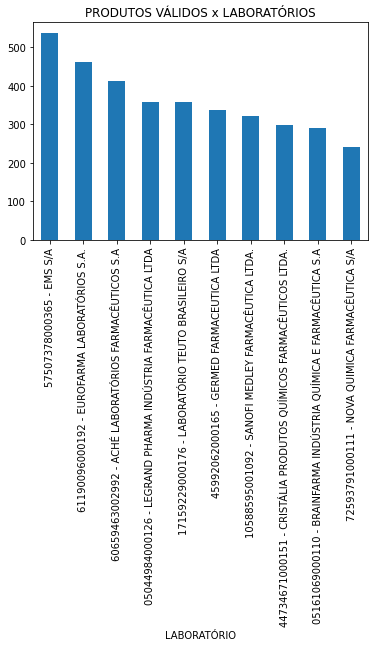

In [ ]:
#GRAFICO VALIDOS
plotVALIDOSimg = produtosVALIDOS.groupby(['LABORATÓRIO']).size().sort_values(ascending=False).head(10).plot(kind='bar').set_title('PRODUTOS VÁLIDOS x LABORATÓRIOS')

In [ ]:
#FILTRANDO OS QUE TEM 'CADUCO' NA COLUNA SITUACAO_REGISTRO E DEIXANDO EM filtrosCADUCOS
filtroCADUCO = df1.SITUACAO_REGISTRO.str.contains('CADUCO')

In [ ]:
#UTILIZANDO O filtroCADUCOS PARA LOCALIZAR OS ITENS E DEIXANDO EM produtosCADUCOS
produtosCADUCOS = df1.loc[filtroCADUCO]

In [ ]:
#AGRUPANDO AS INFORMAÇOES ACIMA EM UM TOP10 (plotCADUCOS)
plotCADUCOS = produtosCADUCOS.groupby(['LABORATÓRIO','SITUACAO_REGISTRO']).size().sort_values(ascending=False).head(10)

In [ ]:
plotCADUCOS

LABORATÓRIO                                                         SITUACAO_REGISTRO
57507378000365 - EMS S/A                                            CADUCO/CANCELADO     539
02932074000191 - HYPERA S.A.                                        CADUCO/CANCELADO     516
45992062000165 - GERMED FARMACEUTICA LTDA                           CADUCO/CANCELADO     511
00923140000131 - EMS SIGMA PHARMA LTDA                              CADUCO/CANCELADO     435
29785870000103 - LABORATÓRIO NEO QUÍMICA COMÉRCIO E INDÚSTRIA LTDA  CADUCO/CANCELADO     416
50929710000179 - MEDLEY INDÚSTRIA FARMACÊUTICA LTDA                 CADUCO/CANCELADO     377
02685377000157 - SANOFI-AVENTIS FARMACÊUTICA LTDA                   CADUCO/CANCELADO     363
61190096000192 - EUROFARMA LABORATÓRIOS S.A.                        CADUCO/CANCELADO     351
05161069000110 - BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A    CADUCO/CANCELADO     328
53162095000106 - BIOSINTÉTICA FARMACÊUTICA LTDA                     CADUCO/CA

####CARREGAMENTO CSV: FILTRO LABxSITUACAO_REGISTO (CANCELADOS/CADUCOS) *ARNALDO

In [ ]:
dfCADUCOS = df1.loc[filtroCADUCO]

In [ ]:
dfCADUCOS.to_csv('prodCADUCOS.csv', index=False)

In [ ]:
dfCADUCOS

,PRODUTO,FINALIZAÇÃO_PROCESSO,CATEGORIA,REGISTRO,VENCIMENTO_REGISTRO,PROCESSO,CLASSE_TERAPEUTICA,LABORATÓRIO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN
3,ARNICA MONTANA,19/03/2002,FITOTERÁPICO,104730021,01/03/2007,25025007821,FITOTERAPICO SIMPLES,92762277000170 - VIDORA FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
4,ARNICA MONTANA L.,01/07/2002,FITOTERÁPICO,131750004,01/06/2007,25351032631,FITOTERAPICO SIMPLES,00925697000101 - LIMED LABORATORIO INDUSTRIAL ...,CADUCO/CANCELADO,NaN
...,...,...,...,...,...,...,...,...,...,...
29534,ácido mefenâmico,22/02/2011,NaN,167730296,01/11/2013,25351652980,ANTINFLAMATORIOS,05044984000126 - LEGRAND PHARMA INDÚSTRIA FARM...,CADUCO/CANCELADO,NaN
29538,ácido ursodesoxicólico,06/07/2020,GENÉRICO,146820094,01/07/2030,25351649704,"COLAGOGOS, COLERETICOS E HEPATOPROTETORES",05035244000123 - SUN FARMACÊUTICA DO BRASIL LTDA,CADUCO/CANCELADO,NaN
29541,"ácido valpróico (PORT. 344/98, L - C1)",03/09/2007,GENÉRICO,109740206,01/09/2012,25351311149,ANTICONVULSIVANTES,49475833000106 - BIOLAB SANUS FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
29544,ácido zoledrônico,23/01/2017,GENÉRICO,100470600,01/01/2027,25351531696,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN


#### PLOTAGEM: PRODUTOS CANCELADOS/CADUCOSxLABORATÓRIOS

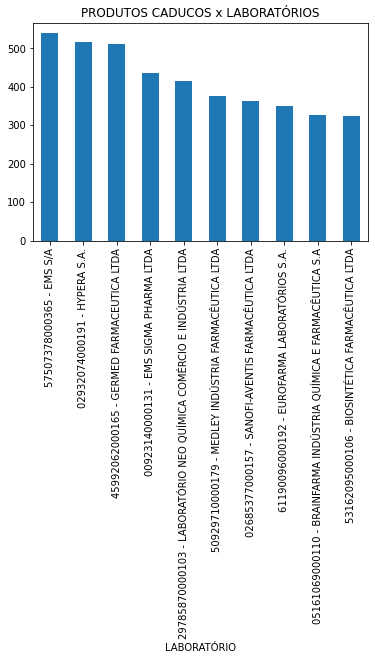

In [ ]:
#GRAFICO CADUCOS
plotCADUCOSimg = produtosCADUCOS.groupby(['LABORATÓRIO']).size().sort_values(ascending=False).head(10).plot(kind='bar').set_title('PRODUTOS CADUCOS x LABORATÓRIOS')

In [ ]:
#COPIA DO DF1 em DF2 
df2 = df1.copy()

In [ ]:
#APENAS VISUALIZANDO
df2.head(3)

,PRODUTO,FINALIZAÇÃO_PROCESSO,CATEGORIA,REGISTRO,VENCIMENTO_REGISTRO,PROCESSO,CLASSE_TERAPEUTICA,LABORATÓRIO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN


#### AGRUPANDO POR CATEGORIA (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)

In [ ]:
#AGRUPANDO POR CATEGORIA (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)
df2.groupby(['CATEGORIA']).size().sort_values(ascending=False).head(10)

CATEGORIA
SIMILAR         14383
GENÉRICO         7093
NOVO             2925
ESPECÍFICO       1352
FITOTERÁPICO     1180
BIOLÓGICO         707
DINAMIZADO        275
RADIOFÁRMACO       43
PRODUTO DE T        3
dtype: int64

####AGRUPANDO POR CLASSE (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)

In [ ]:
#AGRUPANDO POR CLASSE (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)
df2.groupby(['CLASSE_TERAPEUTICA']).size().sort_values(ascending=False).head(10)

CLASSE_TERAPEUTICA
ANTIBIOTICOS SISTEMICOS SIMPLES    1209
ANTINFLAMATORIOS                    866
ANALGESICOS NAO NARCOTICOS          820
ANTIDEPRESSIVOS                     697
ANTINEOPLASICO                      696
ANTI-HIPERTENSIVOS                  620
ANTIDIABETICOS                      494
ANTI-HIPERTENSIVOS SIMPLES          473
ANTICONVULSIVANTES                  470
ANTI-HISTAMINICOS SISTEMICOS        469
dtype: int64

####AGRUPANDO POR PRINCIPIO ATIVO (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)

In [ ]:
#AGRUPANDO POR PRINCIPIO ATIVO (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)
df2.groupby(['PRINCIPIO_ATIVO']).size().sort_values(ascending=False).head(10)

PRINCIPIO_ATIVO
PARACETAMOL                  94
IBUPROFENO                   64
CETOCONAZOL                  59
COLECALCIFEROL               53
NIMESULIDA                   50
HEMITARTARATO DE ZOLPIDEM    50
PREGABALINA                  50
ROSUVASTATINA CÁLCICA        45
OXALATO DE ESCITALOPRAM      44
CLORIDRATO DE AMBROXOL       44
dtype: int64

####AGRUPANDO TODOS OS PRODUTOS POR LABORATORIO (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)

In [ ]:
#AGRUPANDO TODOS OS PRODUTOS POR LABORATORIO (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)
df2.groupby(['LABORATÓRIO']).size().sort_values(ascending=False).head(10)

LABORATÓRIO
57507378000365 - EMS S/A                                            1077
45992062000165 - GERMED FARMACEUTICA LTDA                            847
61190096000192 - EUROFARMA LABORATÓRIOS S.A.                         812
05044984000126 - LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA          672
17159229000176 - LABORATÓRIO TEUTO BRASILEIRO S/A                    619
05161069000110 - BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A     617
60659463002992 - ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A                 599
00923140000131 - EMS SIGMA PHARMA LTDA                               565
02932074000191 - HYPERA S.A.                                         529
60665981000118 - UNIÃO QUÍMICA FARMACÊUTICA NACIONAL S/A             483
dtype: int64

####AGRUPANDO POR LABORATÓRIO x PRINCIPIO ATIVO (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)

In [ ]:
#AGRUPANDO POR LABORATÓRIO x PRINCIPIO ATIVO (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)
df2.groupby(['LABORATÓRIO','CATEGORIA']).size().sort_values(ascending=False).head(10)

LABORATÓRIO                                                       CATEGORIA
57507378000365 - EMS S/A                                          GENÉRICO     559
45992062000165 - GERMED FARMACEUTICA LTDA                         GENÉRICO     536
57507378000365 - EMS S/A                                          SIMILAR      448
61190096000192 - EUROFARMA LABORATÓRIOS S.A.                      SIMILAR      389
17159229000176 - LABORATÓRIO TEUTO BRASILEIRO S/A                 SIMILAR      371
60665981000118 - UNIÃO QUÍMICA FARMACÊUTICA NACIONAL S/A          SIMILAR      335
05044984000126 - LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA       GENÉRICO     328
61190096000192 - EUROFARMA LABORATÓRIOS S.A.                      GENÉRICO     326
44734671000151 - CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.  SIMILAR      316
00923140000131 - EMS SIGMA PHARMA LTDA                            GENÉRICO     294
dtype: int64

####AGRUPANDO POR LABORATÓRIO x CLASSE TERAPEUTICA (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)

In [ ]:
#AGRUPANDO POR LABORATÓRIO x CLASSE TERAPEUTICA (PRODUTOS VÁLIDOS + CANCELADOS)
df2.groupby(['LABORATÓRIO','CLASSE_TERAPEUTICA']).size().sort_values(ascending=False).head(10)

LABORATÓRIO                                                             CLASSE_TERAPEUTICA                
61190096000192 - EUROFARMA LABORATÓRIOS S.A.                            ANTIBIOTICOS SISTEMICOS SIMPLES       52
60862208000141 - FARMACIA E LABORATORIO HOMEOPATICO ALMEIDA PRADO LTDA  MEDICAMENTOS DINAMIZADOS COMPOSTOS    43
57507378000365 - EMS S/A                                                ANTIBIOTICOS SISTEMICOS SIMPLES       43
61190096000192 - EUROFARMA LABORATÓRIOS S.A.                            ANTIDEPRESSIVOS                       43
57507378000365 - EMS S/A                                                ANTINFLAMATORIOS                      41
74455197000190 - PROBIOS COMÉRCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA          ASSOCIACAO HOMEOPATICAS               41
61082426000207 - COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS S.A.     ANALGESICOS NAO NARCOTICOS            37
60862208000141 - FARMACIA E LABORATORIO HOMEOPATICO ALMEIDA PRADO LTDA  ASSOCIACAO HOMEOPATICAS       

####AGRUPANDO POR LABORATÓRIO x PRINCIPIO ATIVOS (PRODUTOS VÁLIDOS + CADUCO/CANCELADOS)

In [ ]:
#AGRUPANDO POR LABORATÓRIO x PRINCIPIO ATIVOS (PRODUTOS VÁLIDOS + CANCELADOS)
df2.groupby(['LABORATÓRIO','PRINCIPIO_ATIVO']).size().sort_values(ascending=False).head(10)

LABORATÓRIO                                                                    PRINCIPIO_ATIVO                                                               
92265552000140 - MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARMACÊUTICOS LTDA  PARACETAMOL                                                                       9
00749145000190 - FDA ALLERGENIC FARMACEUTICA LTDA - EPP                        PROTEÍNAS                                                                         7
02814497000107 - CIMED INDUSTRIA S.A                                           PARACETAMOL                                                                       7
61190096000192 - EUROFARMA LABORATÓRIOS S.A.                                   DESLORATADINA                                                                     7
                                                                               PANTOPRAZOL SÓDICO SESQUI-HIDRATADO                                               7
                           